In [1]:
### Mohammadreza Zamani (10869960) – Asal Abbasnejadfard (10974178)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deep_sleep = './deep_sleep.csv'

In [3]:
energy_bat = 19960 # In Joules

In [5]:
df = pd.read_csv(deep_sleep, sep=',')

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Diference'] = df['Timestamp'].diff().dt.total_seconds()

df['Time'] = np.cumsum(df['Diference'])

In [7]:
df['Data'] = df['Data'] *1e-3

df_high = df[df['Data']>750* 1e-3]

filtered_values = np.where((df['Data'] < 450 * 1e-3) & (df['Data'] > 300 * 1e-3))
df_medium = df.loc[filtered_values]

df_low = df[df['Data'] < 100* 1e-3]

In [8]:
#Deep sleep duration (1 cycle)

df['Time'][424]-df['Time'][226]

np.float64(9.894766999999995)

In [9]:
filtered_values = np.where(df['Data']>750)

In [10]:
# Compute average power values

df_high_av = np.mean(df_high['Data'], axis = 0)
print('Average power of high power data:', df_high_av, "W")

df_medium_av = np.mean(df_medium['Data'], axis = 0)
print('Average power of medium power data:', df_medium_av, "W")

df_low_av = np.mean(df_low['Data'], axis = 0)
print('Average power of low power data:', df_low_av, "W")

df_av = np.mean(df['Data'], axis = 0)
print('Average power:', df_av, "W")

Average power of high power data: 0.7766210256410255 W
Average power of medium power data: 0.3123816149068323 W
Average power of low power data: 0.05966093555093556 W
Average power: 0.19619045454545453 W


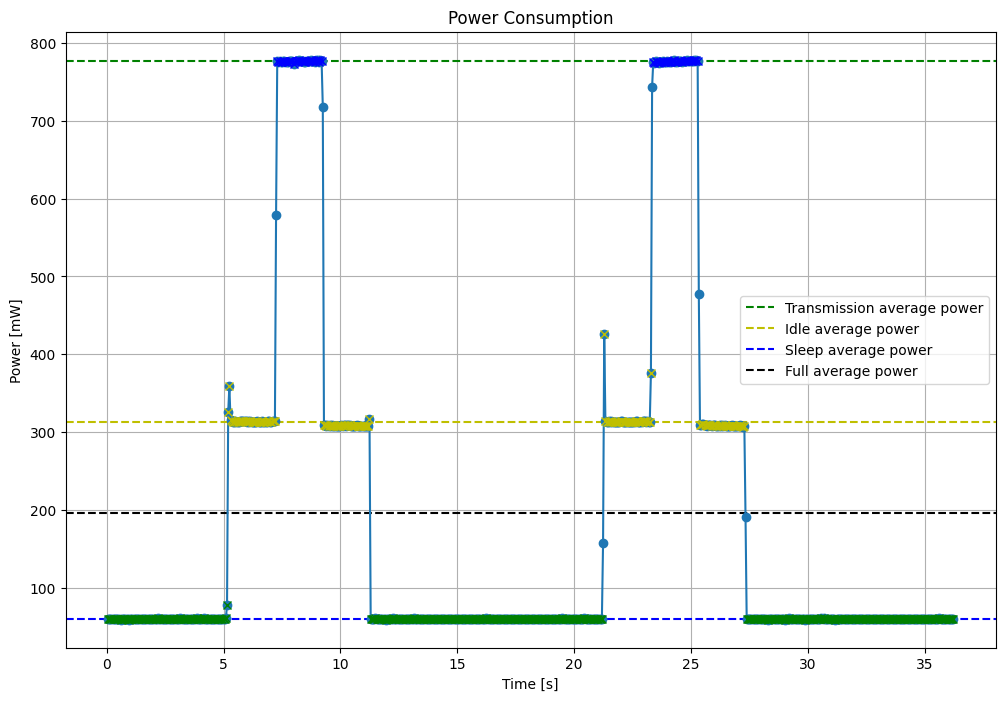

In [11]:
plt.figure(figsize=(12, 8))

plt.axhline(y=df_high_av * 1e3, color='g', linestyle='--', label='Transmission average power')
plt.axhline(y=df_medium_av  * 1e3, color='y', linestyle='--', label='Idle average power')
plt.axhline(y=df_low_av  * 1e3, color='b', linestyle='--', label='Sleep average power')
plt.axhline(y=df_av  * 1e3, color='k', linestyle='--', label='Full average power')

plt.plot(df['Time'], df['Data']  * 1e3, marker='o', linestyle='-')

plt.plot(df_high['Time'], df_high['Data'] * 1e3,color = 'b', marker='x', linestyle='')
plt.plot(df_medium['Time'], df_medium['Data']  * 1e3,color = 'y', marker='x', linestyle='')
plt.plot(df_low['Time'], df_low['Data']  * 1e3,color = 'g', marker='x', linestyle='')

plt.title('Power Consumption')
plt.xlabel('Time [s]')
plt.ylabel('Power [mW]')
plt.grid(True)
plt.legend(loc= 'center right')

plt.show()

In [12]:
df_1st = df[df.index<len(df)/2]

In [13]:
energy_bat = 19960

In [14]:
low_duration = (df['Time'][424] - df['Time'][226])
energy_low = low_duration * df_low_av # expressed in uJ (1mW * 1ms)
print(energy_low)

0.5903310562785237


In [15]:
medium_duration_1 = (df['Time'][144] - df['Time'][104]) + (df['Time'][225] - df['Time'][186])
medium_duration_2 = (df['Time'][466] - df['Time'][426]) + (df['Time'][546] - df['Time'][509])
medium_duration = np.mean([medium_duration_1, medium_duration_2])

energy_medium_1 = medium_duration_1 * df_medium_av # expressed in uJ (1mW * 1s)
energy_medium_2 = medium_duration_2 * df_medium_av # expressed in uJ (1mW * 1s)

energy_medium_1 = energy_medium_1 # in Joules
energy_medium_2 = energy_medium_2 # in Joules
energy_medium = np.mean([energy_medium_1, energy_medium_2])

print("Time: ", ((df['Time'][144] - df['Time'][104]) + (df['Time'][225] - df['Time'][186])), "Energia: ", energy_medium_1)
print("Time: ", ((df['Time'][466] - df['Time'][426]) + (df['Time'][546] - df['Time'][509])), "Energia: ", energy_medium_2)
print("Idle state duration per cycle: ", medium_duration, "Energy consumed:" , energy_medium, "W")

Time:  3.9486149999999993 Energia:  1.2334747303453415
Time:  3.8482819999999975 Energia:  1.2021325457768937
Idle state duration per cycle:  3.8984484999999984 Energy consumed: 1.2178036380611177 W


In [16]:
high_duration_1 = df['Time'][184] - df['Time'][146]
high_duration_2 = df['Time'][506] - df['Time'][468]
high_duration = np.mean([high_duration_1, high_duration_2])

energy_high_1 = high_duration_1 * df_high_av # expressed in uJ (1mW * 1ms)
energy_high_2 = high_duration_2 * df_high_av # expressed in uJ (1mW * 1ms)

energy_high_1 = energy_high_1 * 1e-6 # in Joules
energy_high_2 = energy_high_2 * 1e-6 # in Joules
energy_high = np.mean([energy_high_1, energy_high_2])

print("Time: ", (df['Time'][184] - df['Time'][146]), "Energia: ", energy_high_1)
print("Time: ", (df['Time'][506] - df['Time'][468]), "Energia: ", energy_high_2)
print("Transmission state duration per cycle: ", high_duration, "s", ", Energy consumed:" , energy_high, "W")

Time:  1.8989140000000049 Energia:  1.474736538284106e-06
Time:  1.8996169999999921 Energia:  1.475282502865122e-06
Transmission state duration per cycle:  1.8992654999999985 s , Energy consumed: 1.475009520574614e-06 W


In [17]:
cycle_duration = high_duration + medium_duration + low_duration

In [18]:
energy_cycle = energy_low + energy_medium + energy_high
print("Duration of cycle: ", cycle_duration, "s", "Energy used in sleep state: ", energy_cycle, "W")
print("Energy stored by the battery: ", energy_bat, "Joules")
print("Number of cycles of the battery: ", int(energy_bat//energy_cycle), "cycles")
print("Time to download the battery: ", (energy_bat/energy_cycle * cycle_duration)/3600, "hours")

Duration of cycle:  15.692480999999992 s Energy used in sleep state:  1.8081361693491618 W
Energy stored by the battery:  19960 Joules
Number of cycles of the battery:  11038 cycles
Time to download the battery:  48.11921279762783 hours
